In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pwd

/Users/zschulzb/OneDrive/_mydev/galvanize/capstones/cap2/project_init/src


In [2]:
season_18_19 = pd.read_csv('../data/premier_league/season-1819_csv.csv')
season_17_18 = pd.read_csv('../data/premier_league/season-1718_csv.csv')
season_16_17 = pd.read_csv('../data/premier_league/season-1617_csv.csv')
season_15_16 = pd.read_csv('../data/premier_league/season-1516_csv.csv')
season_14_15 = pd.read_csv('../data/premier_league/season-1415_csv.csv')
season_13_14 = pd.read_csv('../data/premier_league/season-1314_csv.csv')
season_12_13 = pd.read_csv('../data/premier_league/season-1213_csv.csv')
season_11_12 = pd.read_csv('../data/premier_league/season-1112_csv.csv')
season_10_11 = pd.read_csv('../data/premier_league/season-1011_csv.csv')
season_09_10 = pd.read_csv('../data/premier_league/season-0910_csv.csv')

In [3]:
seasons = [season_18_19, season_17_18, season_16_17, season_15_16, season_14_15, season_13_14, season_12_13, season_11_12, season_10_11, season_09_10]

In [4]:
season_num = 'Season'

for i, s in enumerate(seasons[::-1]):
    s[season_num] = i + 1

In [5]:
ten_season_df = pd.concat(seasons)

In [6]:
stat_features = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'Season']

described_features = ['HomeTeam', 'AwayTeam', 'Final_Goals_H', 'Final_Goals_A', 'Final_Result', 'Half_Goals_H', 'Half_Goals_A', 'Half_Result', 'Referee', 'Shots_H', 'Shots_A', 'Target_Shots_H', 'Target_Shots_A', 'Fouls_H', 'Fouls_A', 'Corners_H', 'Corners_A', 'Yellow_H', 'Yellow_A', 'Red_H', 'Red_A', 'Season']

In [7]:
game_stats = ten_season_df[stat_features]
game_stats.Date = pd.to_datetime(game_stats.Date)
game_stats.set_index(game_stats['Date'], inplace=True)
game_stats.drop(['Date'], axis=1, inplace=True)
game_stats.columns = described_features
game_stats.drop(['Half_Goals_H','Half_Goals_A', 'Half_Result','Referee'], axis=1, inplace=True)

In [8]:
game_stats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3800 entries, 2018-10-08 to 2010-05-09
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HomeTeam        3800 non-null   object
 1   AwayTeam        3800 non-null   object
 2   Final_Goals_H   3800 non-null   int64 
 3   Final_Goals_A   3800 non-null   int64 
 4   Final_Result    3800 non-null   object
 5   Shots_H         3800 non-null   int64 
 6   Shots_A         3800 non-null   int64 
 7   Target_Shots_H  3800 non-null   int64 
 8   Target_Shots_A  3800 non-null   int64 
 9   Fouls_H         3800 non-null   int64 
 10  Fouls_A         3800 non-null   int64 
 11  Corners_H       3800 non-null   int64 
 12  Corners_A       3800 non-null   int64 
 13  Yellow_H        3800 non-null   int64 
 14  Yellow_A        3800 non-null   int64 
 15  Red_H           3800 non-null   int64 
 16  Red_A           3800 non-null   int64 
 17  Season          3800 non-null   in

# Insert menu here

In [9]:
team = 'Arsenal'

In [10]:
test_team_home = game_stats[game_stats.HomeTeam == team]

In [11]:
test_team_away = game_stats[game_stats.AwayTeam == team]

In [12]:
test_team_away.AwayTeam.unique()

array(['Arsenal'], dtype=object)

In [13]:
test_team_home

,HomeTeam,AwayTeam,Final_Goals_H,Final_Goals_A,Final_Result,Shots_H,Shots_A,Target_Shots_H,Target_Shots_A,Fouls_H,Fouls_A,Corners_H,Corners_A,Yellow_H,Yellow_A,Red_H,Red_A,Season
Date,,,,,,,,,,,,,,,,,,
2018-12-08,Arsenal,Man City,0,2,A,9,17,3,8,11,14,2,9,2,2,0,0,10
2018-08-25,Arsenal,West Ham,3,1,H,17,13,10,5,16,13,10,2,1,3,0,0,10
2018-09-23,Arsenal,Everton,2,0,H,9,9,5,6,17,12,5,9,2,1,0,0,10
2018-09-29,Arsenal,Watford,2,0,H,9,13,2,4,11,17,6,6,2,2,0,0,10
2018-10-22,Arsenal,Leicester,3,1,H,19,8,6,2,10,10,6,4,2,2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-06,Arsenal,Burnley,3,1,H,20,8,11,5,5,12,8,2,0,4,0,0,1
2010-03-20,Arsenal,West Ham,2,0,H,9,8,5,4,7,24,4,2,1,4,1,0,1
2010-04-03,Arsenal,Wolves,1,0,H,23,3,13,2,10,13,10,4,0,2,0,1,1


In [14]:
len(test_team_home.AwayTeam.unique())

35

In [15]:
team_home = game_stats[game_stats.HomeTeam == 'Man City']
team_away = game_stats[game_stats.AwayTeam == 'Man City']

In [16]:
total_wins = np.sum(team_home.Final_Result == 'H') + np.sum(team_away.Final_Result == 'A')
total_loss = np.sum(team_home.Final_Result == 'A') + np.sum(team_away.Final_Result == 'H')
total_draw = np.sum(team_home.Final_Result == 'D') + np.sum(team_away.Final_Result == 'D')
total_wins, total_loss, total_draw, total_wins+total_loss+total_draw == len(team_home+team_away)

(247, 62, 71, True)

In [17]:
game_stats.Season.unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [18]:
np.sum(game_stats[game_stats.Season <= 8].Final_Result == 'H')

1404

In [19]:
np.sum(team_home[team_home.Season > 8].Final_Result == 'H') + np.sum(team_away[team_away.Season > 8].Final_Result == 'A')

64

In [20]:
64 + 183

247

In [21]:
np.sum(team_home[team_home.Season <=8].Final_Result == 'H') + np.sum(team_away[team_away.Season <=8].Final_Result == 'A')

183

In [22]:
total_wins

247

In [23]:
# print('Seasons 09-17 win percentage)

print('''Team Win Percentage: {0:0.2f}%
Team Loss Percentage: {1:0.2f}%
Team Draw Percentage: {2:0.2f}%'''.format((total_wins/len(team_home+team_away))*100, 
                                            (total_loss/len(team_home+team_away))*100,
                                            (total_draw/len(team_home+team_away))*100))

Team Win Percentage: 65.00%
Team Loss Percentage: 16.32%
Team Draw Percentage: 18.68%


In [24]:
home_final_dummies = pd.get_dummies(team_home.Final_Result, prefix='Home_Final', drop_first=True)
# home_half_dummies = pd.get_dummies(team_home.Half_Result, prefix='Home_Half', drop_first=True)

In [25]:
home_final_dummies.Home_Final_D.value_counts()

0    163
1     27
Name: Home_Final_D, dtype: int64

In [26]:
team_home = pd.concat([team_home, home_final_dummies], axis=1)

In [27]:
away_final_dummies = pd.get_dummies(team_away.Final_Result, prefix='Away_Final')
# away_half_dummies = pd.get_dummies(team_away.Half_Result, prefix='Away_Half', drop_first=True)

In [28]:
away_final_dummies.Away_Final_H.value_counts()

0    146
1     44
Name: Away_Final_H, dtype: int64

In [29]:
away_final_dummies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2018-12-08 to 2010-05-09
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Away_Final_A  190 non-null    uint8
 1   Away_Final_D  190 non-null    uint8
 2   Away_Final_H  190 non-null    uint8
dtypes: uint8(3)
memory usage: 7.0 KB


In [30]:
away_final_dummies

,Away_Final_A,Away_Final_D,Away_Final_H
Date,,,
2018-12-08,1,0,0
2018-08-25,0,1,0
2018-09-22,1,0,0
2018-07-10,0,1,0
2018-10-29,1,0,0
...,...,...,...
2010-03-14,0,1,0
2010-03-21,1,0,0
2010-04-03,1,0,0


In [31]:
away_final_dummies.Away_Final_D.unique(), home_final_dummies.Home_Final_D.unique()

(array([0, 1], dtype=uint8), array([0, 1], dtype=uint8))

In [32]:
team_away = pd.concat([team_away, away_final_dummies], axis=1)
team_away.drop('Away_Final_H', axis=1, inplace=True)

In [33]:
# rolling 10 game avg
# manch_home['goals_SMA'] = manch_home.Final_Goals_H[::-1].rolling(10).mean()

In [34]:
team_home.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2018-08-19 to 2010-05-05
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HomeTeam        190 non-null    object
 1   AwayTeam        190 non-null    object
 2   Final_Goals_H   190 non-null    int64 
 3   Final_Goals_A   190 non-null    int64 
 4   Final_Result    190 non-null    object
 5   Shots_H         190 non-null    int64 
 6   Shots_A         190 non-null    int64 
 7   Target_Shots_H  190 non-null    int64 
 8   Target_Shots_A  190 non-null    int64 
 9   Fouls_H         190 non-null    int64 
 10  Fouls_A         190 non-null    int64 
 11  Corners_H       190 non-null    int64 
 12  Corners_A       190 non-null    int64 
 13  Yellow_H        190 non-null    int64 
 14  Yellow_A        190 non-null    int64 
 15  Red_H           190 non-null    int64 
 16  Red_A           190 non-null    int64 
 17  Season          190 non-null    int

In [35]:
#concat to first dataframe, don't make a second
team_away.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2018-12-08 to 2010-05-09
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HomeTeam        190 non-null    object
 1   AwayTeam        190 non-null    object
 2   Final_Goals_H   190 non-null    int64 
 3   Final_Goals_A   190 non-null    int64 
 4   Final_Result    190 non-null    object
 5   Shots_H         190 non-null    int64 
 6   Shots_A         190 non-null    int64 
 7   Target_Shots_H  190 non-null    int64 
 8   Target_Shots_A  190 non-null    int64 
 9   Fouls_H         190 non-null    int64 
 10  Fouls_A         190 non-null    int64 
 11  Corners_H       190 non-null    int64 
 12  Corners_A       190 non-null    int64 
 13  Yellow_H        190 non-null    int64 
 14  Yellow_A        190 non-null    int64 
 15  Red_H           190 non-null    int64 
 16  Red_A           190 non-null    int64 
 17  Season          190 non-null    int

# Instantiate Full Record DB

In [36]:
full_record_list = [team_home, team_away]
full_record = pd.concat(full_record_list)

In [37]:
full_record.Away_Final_D.unique(), full_record.Home_Final_D.unique()

(array([nan,  0.,  1.]), array([ 0.,  1., nan]))

In [38]:
full_record.Home_Final_D.fillna(0, inplace=True)
full_record.Away_Final_D.fillna(0, inplace=True)

In [39]:
full_record.Home_Final_H.fillna(0, inplace=True)
full_record.Away_Final_A.fillna(0, inplace=True)

In [40]:
full_record.Away_Final_D.unique(), full_record.Home_Final_D.unique()

(array([0., 1.]), array([0., 1.]))

In [41]:
full_record['Final_D'] = full_record.Home_Final_D + full_record.Away_Final_D

In [42]:
full_record.Final_D.unique()

array([0., 1.])

In [43]:
full_record.drop(['Home_Final_D', 'Away_Final_D'], axis=1, inplace=True)

In [44]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2018-08-19 to 2010-05-09
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomeTeam        380 non-null    object 
 1   AwayTeam        380 non-null    object 
 2   Final_Goals_H   380 non-null    int64  
 3   Final_Goals_A   380 non-null    int64  
 4   Final_Result    380 non-null    object 
 5   Shots_H         380 non-null    int64  
 6   Shots_A         380 non-null    int64  
 7   Target_Shots_H  380 non-null    int64  
 8   Target_Shots_A  380 non-null    int64  
 9   Fouls_H         380 non-null    int64  
 10  Fouls_A         380 non-null    int64  
 11  Corners_H       380 non-null    int64  
 12  Corners_A       380 non-null    int64  
 13  Yellow_H        380 non-null    int64  
 14  Yellow_A        380 non-null    int64  
 15  Red_H           380 non-null    int64  
 16  Red_A           380 non-null    int64  
 17  Season          

In [45]:
# prove time is out of order
full_record.index[:193]

DatetimeIndex(['2018-08-19', '2018-01-09', '2018-09-15', '2018-09-29',
               '2018-10-20', '2018-04-11', '2018-11-11', '2018-01-12',
               '2018-12-15', '2018-12-22',
               ...
               '2010-02-21', '2010-03-24', '2010-03-29', '2010-04-11',
               '2010-04-17', '2010-05-01', '2010-05-05', '2018-12-08',
               '2018-08-25', '2018-09-22'],
              dtype='datetime64[ns]', name='Date', length=193, freq=None)

In [46]:
full_record = full_record.sort_index()[::-1]

In [47]:
# binary if team is home or not

full_record['Home_Field_Advantage'] = np.where(full_record.HomeTeam == 'Man City', 1, 0)

In [48]:
# full_record['Accum_home_reds'] = full_record.Red_A[full_record.HomeTeam == 'Man City'].rolling(10).sum()

In [49]:
# full_record['Accum_away_reds'] = full_record.Red_A[full_record.AwayTeam == 'Man City'].rolling(10).sum()

In [50]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomeTeam              380 non-null    object 
 1   AwayTeam              380 non-null    object 
 2   Final_Goals_H         380 non-null    int64  
 3   Final_Goals_A         380 non-null    int64  
 4   Final_Result          380 non-null    object 
 5   Shots_H               380 non-null    int64  
 6   Shots_A               380 non-null    int64  
 7   Target_Shots_H        380 non-null    int64  
 8   Target_Shots_A        380 non-null    int64  
 9   Fouls_H               380 non-null    int64  
 10  Fouls_A               380 non-null    int64  
 11  Corners_H             380 non-null    int64  
 12  Corners_A             380 non-null    int64  
 13  Yellow_H              380 non-null    int64  
 14  Yellow_A              380 non-null    int64  
 15  Red_

In [51]:
full_record.drop(['HomeTeam', 'AwayTeam', 'Final_Result'], axis=1, inplace=True)

In [52]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Final_Goals_H         380 non-null    int64  
 1   Final_Goals_A         380 non-null    int64  
 2   Shots_H               380 non-null    int64  
 3   Shots_A               380 non-null    int64  
 4   Target_Shots_H        380 non-null    int64  
 5   Target_Shots_A        380 non-null    int64  
 6   Fouls_H               380 non-null    int64  
 7   Fouls_A               380 non-null    int64  
 8   Corners_H             380 non-null    int64  
 9   Corners_A             380 non-null    int64  
 10  Yellow_H              380 non-null    int64  
 11  Yellow_A              380 non-null    int64  
 12  Red_H                 380 non-null    int64  
 13  Red_A                 380 non-null    int64  
 14  Season                380 non-null    int64  
 15  Home

In [53]:
mask = full_record.Home_Field_Advantage.astype(dtype='bool')
# mask, ~mask

In [54]:
# copy3 = full_record.copy()
full_record.Home_Field_Advantage = full_record.Home_Field_Advantage.astype(dtype='bool')

### convert back to int for training

In [55]:
# df.Home_Field_Advantage = dfd.Home_Field_Advantage.astype(dtype='int64')
# copy3.head()

In [56]:
full_record['Shot_Accuracy_H'] = np.where(full_record.Home_Field_Advantage, full_record.Target_Shots_H/full_record.Shots_H, 0)

In [57]:
full_record['Shot_Accuracy_A'] = np.where(~full_record.Home_Field_Advantage, full_record.Target_Shots_A/full_record.Shots_A, 0)

In [58]:
len(stat_features)

23

In [59]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Final_Goals_H         380 non-null    int64  
 1   Final_Goals_A         380 non-null    int64  
 2   Shots_H               380 non-null    int64  
 3   Shots_A               380 non-null    int64  
 4   Target_Shots_H        380 non-null    int64  
 5   Target_Shots_A        380 non-null    int64  
 6   Fouls_H               380 non-null    int64  
 7   Fouls_A               380 non-null    int64  
 8   Corners_H             380 non-null    int64  
 9   Corners_A             380 non-null    int64  
 10  Yellow_H              380 non-null    int64  
 11  Yellow_A              380 non-null    int64  
 12  Red_H                 380 non-null    int64  
 13  Red_A                 380 non-null    int64  
 14  Season                380 non-null    int64  
 15  Home

In [60]:
####'need more data engineering'
# fig, ax = plt.subplots(figsize=(10,10))
# reds = [full_record.Accum_home_reds, full_record.Accum_away_reds]

# # ax.plot(full_record.Final_Goals_H);

In [61]:
full_record.drop(['Shots_H', 'Shots_A', 'Target_Shots_H', 'Target_Shots_A'], axis=1, inplace=True)

In [62]:
full_record.Final_Goals_H.unique(), full_record.Final_Goals_H.value_counts()

(array([1, 6, 3, 0, 2, 5, 4, 7]),
 1    98
 0    89
 2    85
 3    57
 4    29
 5    13
 6     7
 7     2
 Name: Final_Goals_H, dtype: int64)

In [63]:
full_record.Final_Goals_H.unique(), full_record.Final_Goals_H.value_counts()

(array([1, 6, 3, 0, 2, 5, 4, 7]),
 1    98
 0    89
 2    85
 3    57
 4    29
 5    13
 6     7
 7     2
 Name: Final_Goals_H, dtype: int64)

In [64]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Final_Goals_H         380 non-null    int64  
 1   Final_Goals_A         380 non-null    int64  
 2   Fouls_H               380 non-null    int64  
 3   Fouls_A               380 non-null    int64  
 4   Corners_H             380 non-null    int64  
 5   Corners_A             380 non-null    int64  
 6   Yellow_H              380 non-null    int64  
 7   Yellow_A              380 non-null    int64  
 8   Red_H                 380 non-null    int64  
 9   Red_A                 380 non-null    int64  
 10  Season                380 non-null    int64  
 11  Home_Final_H          380 non-null    float64
 12  Away_Final_A          380 non-null    float64
 13  Final_D               380 non-null    float64
 14  Home_Field_Advantage  380 non-null    bool   
 15  Shot

# Create features that only pertain to team in question
## Need to address 10 total features, 5 unique feature aspects

## Final Goals

In [65]:
full_record.Final_Goals_H = np.where(full_record.Home_Field_Advantage, full_record.Final_Goals_H, 0)

In [66]:
full_record.Final_Goals_A = np.where(~full_record.Home_Field_Advantage, full_record.Final_Goals_A, 0)

## Fouls

In [67]:
full_record.Fouls_H = np.where(full_record.Home_Field_Advantage, full_record.Fouls_H, 0)

In [68]:
full_record.Fouls_A = np.where(~full_record.Home_Field_Advantage, full_record.Fouls_A, 0)

## Corners

In [69]:
full_record.Corners_H = np.where(full_record.Home_Field_Advantage, full_record.Corners_H, 0)

In [70]:
full_record.Corners_A = np.where(~full_record.Home_Field_Advantage, full_record.Corners_A, 0)

## Yellows

In [71]:
full_record.Yellow_H = np.where(full_record.Home_Field_Advantage, full_record.Yellow_H, 0)

In [72]:
full_record.Yellow_A = np.where(~full_record.Home_Field_Advantage, full_record.Yellow_A, 0)

## Reds

In [73]:
full_record.Red_H = np.where(full_record.Home_Field_Advantage, full_record.Red_H, 0)

In [74]:
full_record.Red_A = np.where(~full_record.Home_Field_Advantage, full_record.Red_A, 0)

# new df

In [75]:
full_record.head()

,Final_Goals_H,Final_Goals_A,Fouls_H,Fouls_A,Corners_H,Corners_A,Yellow_H,Yellow_A,Red_H,Red_A,Season,Home_Final_H,Away_Final_A,Final_D,Home_Field_Advantage,Shot_Accuracy_H,Shot_Accuracy_A
Date,,,,,,,,,,,,,,,,,
2019-12-05,0,4,0,8,0,6,0,0,0,0,10,0.0,1.0,0.0,False,0.000000,0.450000
2019-10-02,6,0,9,0,2,0,1,0,0,0,10,1.0,0.0,0.0,True,0.600000,0.000000
2019-09-03,3,0,11,0,9,0,1,0,0,0,10,1.0,0.0,0.0,True,0.473684,0.000000
2019-06-05,1,0,12,0,11,0,3,0,0,0,10,1.0,0.0,0.0,True,0.263158,0.000000
2019-06-02,0,2,0,6,0,6,0,1,0,0,10,0.0,1.0,0.0,False,0.000000,0.266667


In [76]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Final_Goals_H         380 non-null    int64  
 1   Final_Goals_A         380 non-null    int64  
 2   Fouls_H               380 non-null    int64  
 3   Fouls_A               380 non-null    int64  
 4   Corners_H             380 non-null    int64  
 5   Corners_A             380 non-null    int64  
 6   Yellow_H              380 non-null    int64  
 7   Yellow_A              380 non-null    int64  
 8   Red_H                 380 non-null    int64  
 9   Red_A                 380 non-null    int64  
 10  Season                380 non-null    int64  
 11  Home_Final_H          380 non-null    float64
 12  Away_Final_A          380 non-null    float64
 13  Final_D               380 non-null    float64
 14  Home_Field_Advantage  380 non-null    bool   
 15  Shot

In [77]:
eng_feature_list = ['home_goals', 'away_goals', 'home_fouls', 'away_fouls', 'home_corners', 'away_corners', 'home_yellows', 'away_yellows', 'home_reds', 'away_reds', 'season_num', 'home_win', 'away_win', 'draw', 'home_field_advantage', 'home_on_target_accuracy', 'away_on_target_accuracy']
len(eng_feature_list)

17

In [78]:
ordered_eng_feature_list = ['home_field_advantage', 'home_goals', 'away_goals','home_on_target_accuracy', 'away_on_target_accuracy', 'home_fouls', 'away_fouls', 'home_reds', 'away_reds', 'home_yellows','away_yellows', 'home_win', 'away_win', 'draw', 'home_corners', 'away_corners', 'season_num']
len(ordered_eng_feature_list)

17

In [79]:
# copy = full_record.copy()
full_record.columns = eng_feature_list
# copy.info()

In [80]:
full_record = full_record[ordered_eng_feature_list]

In [81]:
full_record.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2019-12-05 to 2009-08-15
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   home_field_advantage     380 non-null    bool   
 1   home_goals               380 non-null    int64  
 2   away_goals               380 non-null    int64  
 3   home_on_target_accuracy  380 non-null    float64
 4   away_on_target_accuracy  380 non-null    float64
 5   home_fouls               380 non-null    int64  
 6   away_fouls               380 non-null    int64  
 7   home_reds                380 non-null    int64  
 8   away_reds                380 non-null    int64  
 9   home_yellows             380 non-null    int64  
 10  away_yellows             380 non-null    int64  
 11  home_win                 380 non-null    float64
 12  away_win                 380 non-null    float64
 13  draw                     380 non-null    float64
 14  home_co

In [82]:
full_record.head()

,home_field_advantage,home_goals,away_goals,home_on_target_accuracy,away_on_target_accuracy,home_fouls,away_fouls,home_reds,away_reds,home_yellows,away_yellows,home_win,away_win,draw,home_corners,away_corners,season_num
Date,,,,,,,,,,,,,,,,,
2019-12-05,False,0,4,0.000000,0.450000,0,8,0,0,0,0,0.0,1.0,0.0,0,6,10
2019-10-02,True,6,0,0.600000,0.000000,9,0,0,0,1,0,1.0,0.0,0.0,2,0,10
2019-09-03,True,3,0,0.473684,0.000000,11,0,0,0,1,0,1.0,0.0,0.0,9,0,10
2019-06-05,True,1,0,0.263158,0.000000,12,0,0,0,3,0,1.0,0.0,0.0,11,0,10
2019-06-02,False,0,2,0.000000,0.266667,0,6,0,0,0,1,0.0,1.0,0.0,0,6,10


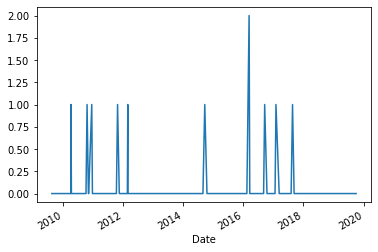

In [83]:
full_record.home_reds[full_record.home_field_advantage].plot()

In [84]:
full_record.head()

,home_field_advantage,home_goals,away_goals,home_on_target_accuracy,away_on_target_accuracy,home_fouls,away_fouls,home_reds,away_reds,home_yellows,away_yellows,home_win,away_win,draw,home_corners,away_corners,season_num
Date,,,,,,,,,,,,,,,,,
2019-12-05,False,0,4,0.000000,0.450000,0,8,0,0,0,0,0.0,1.0,0.0,0,6,10
2019-10-02,True,6,0,0.600000,0.000000,9,0,0,0,1,0,1.0,0.0,0.0,2,0,10
2019-09-03,True,3,0,0.473684,0.000000,11,0,0,0,1,0,1.0,0.0,0.0,9,0,10
2019-06-05,True,1,0,0.263158,0.000000,12,0,0,0,3,0,1.0,0.0,0.0,11,0,10
2019-06-02,False,0,2,0.000000,0.266667,0,6,0,0,0,1,0.0,1.0,0.0,0,6,10


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [91]:
df = full_record.copy()

In [88]:
y = df.pop('home_reds')

In [89]:
X = df.values

In [94]:
df[df.season_num <= 8]

,home_field_advantage,home_goals,away_goals,home_on_target_accuracy,away_on_target_accuracy,home_fouls,away_fouls,home_reds,away_reds,home_yellows,away_yellows,home_win,away_win,draw,home_corners,away_corners,season_num
Date,,,,,,,,,,,,,,,,,
2017-08-04,True,3,0,0.304348,0.000000,6,0,0,0,0,0,1.0,0.0,0.0,7,0,8
2017-08-03,True,0,0,0.083333,0.000000,8,0,0,0,1,0,0.0,0.0,1.0,8,0,8
2017-06-05,True,5,0,0.461538,0.000000,12,0,0,0,1,0,1.0,0.0,0.0,9,0,8
2017-05-21,False,0,5,0.000000,0.600000,0,10,0,0,0,0,0.0,1.0,0.0,0,5,8
2017-05-16,True,3,0,0.476190,0.000000,8,0,0,0,1,0,1.0,0.0,0.0,7,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-09-20,False,0,3,0.000000,0.600000,0,14,0,0,0,2,0.0,0.0,0.0,0,1,1
2009-09-12,True,4,0,0.600000,0.000000,13,0,0,0,3,0,1.0,0.0,0.0,3,0,1
2009-08-30,False,0,1,0.000000,0.666667,0,7,0,0,0,1,0.0,1.0,0.0,0,11,1


In [98]:
8 * 38, 2 * 38, 10 * 38

(304, 76, 380)

In [96]:
train, test = df[df.season_num <=8], df[df.season_num > 8]

In [99]:
len(train), len(test)

(304, 76)